In [44]:
# It is considered to be better than Exponetially weighted moving avg
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline


In [45]:
pip install statsmodel

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [46]:
df = pd.read_csv('../../Time-series-analysis/Data/airline_passengers.csv',index_col='Month')

In [47]:
df = df.dropna()

In [48]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [49]:
# From documentation, MS stands for monthly start
df.index.freq = 'MS'

In [50]:
df.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [51]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [52]:
# Read documentation
span = 12
alpha = 2/(span+1)

In [53]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [54]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01,112,112.000000
1949-02,118,112.923077
1949-03,132,115.857988
1949-04,129,117.879836
1949-05,121,118.359861


In [55]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [56]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [57]:
fitted_model.fittedvalues

Month
1949-01    112.000000
1949-02    112.000000
1949-03    112.923077
1949-04    115.857988
1949-05    117.879836
              ...    
1960-08    474.698368
1960-09    494.898619
1960-10    496.914216
1960-11    491.388952
1960-12    475.790652
Length: 144, dtype: float64

In [58]:
# SES - Simple Exponential Smoothing, 
df['SES'] = fitted_model.fittedvalues.shift(-1)

In [59]:
# Here you see that EWMA12 i.e Exponentially Weighted Moving Average is exactly same as SES# 
df.head()

,Thousands of Passengers,EWMA12,SES
Month,,,
1949-01,112,112.000000,112.000000
1949-02,118,112.923077,112.923077
1949-03,132,115.857988,115.857988
1949-04,129,117.879836,117.879836
1949-05,121,118.359861,118.359861


In [60]:
# Double Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='Month'>

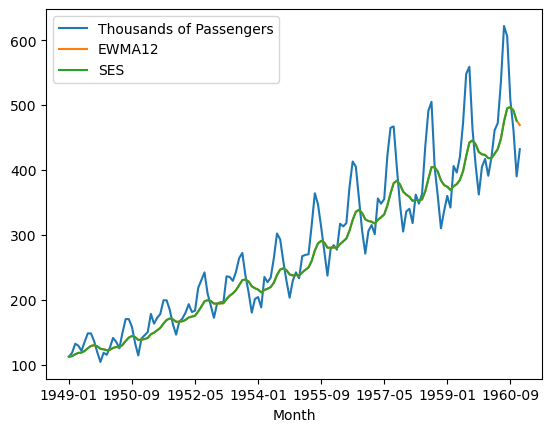

In [61]:
# SES12 and EWMA12 are exactly the same, that is why you do not see the orange line as they overlap. 
# If the time series displays a straight line slope trend you use additive adjustment. If it shows an exponential 
# or curved trend, you would use a multiplicative adjustment.
df.plot()

In [62]:
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)

C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
df.head()

,Thousands of Passengers,EWMA12,SES,DES_add_12
Month,,,,
1949-01,112,112.000000,112.000000,114.102394
1949-02,118,112.923077,112.923077,120.040657
1949-03,132,115.857988,115.857988,134.001539
1949-04,129,117.879836,117.879836,131.085845
1949-05,121,118.359861,118.359861,123.110263


<Axes: xlabel='Month'>

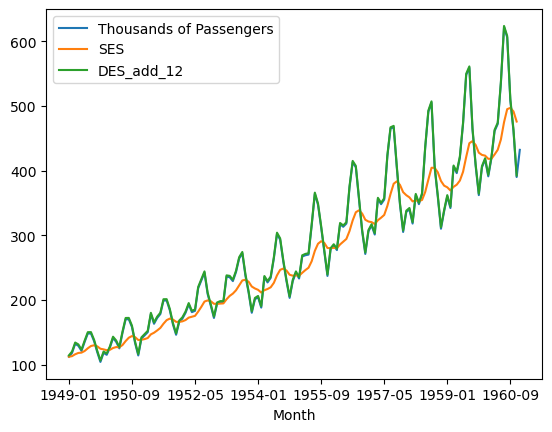

In [64]:
# Thousand of passengers and DES is so close that it is not visible here
df[['Thousands of Passengers','SES','DES_add_12']].plot()

<Axes: xlabel='Month'>

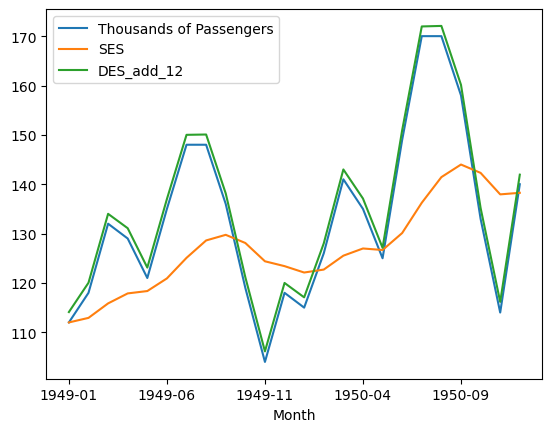

In [65]:
# Now you can see them when you zoom in
df[['Thousands of Passengers','SES','DES_add_12']].iloc[:24].plot()

In [66]:
# Now let us assume that the trend is multiplicative
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)

C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [67]:
df.head()

,Thousands of Passengers,EWMA12,SES,DES_add_12,DES_mul_12
Month,,,,,
1949-01,112,112.000000,112.000000,114.102394,113.990701
1949-02,118,112.923077,112.923077,120.040657,120.031669
1949-03,132,115.857988,115.857988,134.001539,134.235979
1949-04,129,117.879836,117.879836,131.085845,131.270786
1949-05,121,118.359861,118.359861,123.110263,123.156267


<Axes: xlabel='Month'>

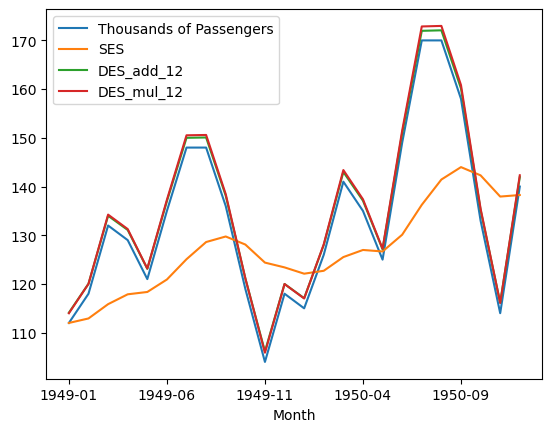

In [68]:
# Additive and multiplicative both are performing very well
df[['Thousands of Passengers','SES','DES_add_12','DES_mul_12']].iloc[:24].plot()

In [71]:
# Triple exponential Smoothing - data, trend and seasonality
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues

C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ArnabBiswas\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [72]:
df.head()

,Thousands of Passengers,EWMA12,SES,DES_add_12,DES_mul_12,TES_add_12,TES_mul_12
Month,,,,,,,
1949-01,112,112.000000,112.000000,114.102394,113.990701,111.591127,111.591127
1949-02,118,112.923077,112.923077,120.040657,120.031669,118.838169,118.838169
1949-03,132,115.857988,115.857988,134.001539,134.235979,133.330402,133.330402
1949-04,129,117.879836,117.879836,131.085845,131.270786,127.898656,127.898656
1949-05,121,118.359861,118.359861,123.110263,123.156267,120.979274,120.979274


<Axes: xlabel='Month'>

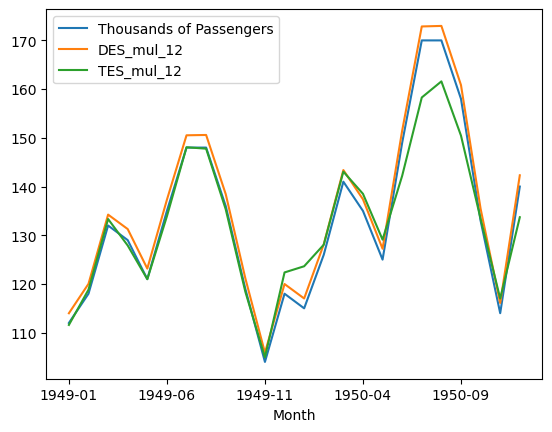

In [74]:
# For first 2 years DES or double exponential smoothing is performing better than tiple exponential smoothing
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[:24].plot()

<Axes: xlabel='Month'>

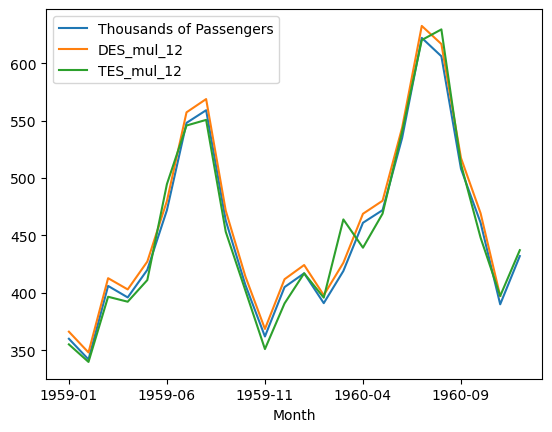

In [75]:
# For last 2 years TES is performing better than DES
df[['Thousands of Passengers','DES_mul_12','TES_mul_12']].iloc[-24:].plot()

In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [78]:
mean_absolute_error(df['Thousands of Passengers'], df['TES_mul_12'])

7.504188182622482

In [80]:
df['TES_mul_12'].describe()

count    144.000000
mean     279.990144
std      120.230670
min      104.952908
25%      184.150258
50%      268.384372
75%      356.778428
max      629.399291
Name: TES_mul_12, dtype: float64

In [81]:
mean_squared_error(df['Thousands of Passengers'], df['TES_mul_12'])

109.75900904187708

In [82]:
df

,Thousands of Passengers,EWMA12,SES,DES_add_12,DES_mul_12,TES_add_12,TES_mul_12
Month,,,,,,,
1949-01,112,112.000000,112.000000,114.102394,113.990701,111.591127,111.591127
1949-02,118,112.923077,112.923077,120.040657,120.031669,118.838169,118.838169
1949-03,132,115.857988,115.857988,134.001539,134.235979,133.330402,133.330402
1949-04,129,117.879836,117.879836,131.085845,131.270786,127.898656,127.898656
1949-05,121,118.359861,118.359861,123.110263,123.156267,120.979274,120.979274
...,...,...,...,...,...,...,...
1960-08,606,494.898619,494.898619,608.168786,616.673652,629.399291,629.399291
1960-09,508,496.914216,496.914216,510.571382,517.378618,511.999442,511.999442
1960-10,461,491.388952,491.388952,463.313463,469.290950,448.034398,448.034398
